In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [25]:
batch_size = 32
img_height, img_width = 128, 128  # Ukuran gambar (ubah sesuai kebutuhan)

# Data generator untuk training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    "dataset/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

# Data generator untuk validation
val_data = train_datagen.flow_from_directory(
    "dataset/",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)


Found 2890 images belonging to 6 classes.
Found 720 images belonging to 6 classes.


In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\alifi\OneDrive\Documents\python\mushroom-dataset\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
epochs = 30
history = model.fit(train_data, epochs=epochs, validation_data=val_data)


c:\Users\alifi\OneDrive\Documents\python\mushroom-dataset\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 26s 268ms/step - accuracy: 0.2687 - loss: 1.7857 - val_accuracy: 0.4222 - val_loss: 1.5252
Epoch 2/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 22s 239ms/step - accuracy: 0.4392 - loss: 1.4231 - val_accuracy: 0.4708 - val_loss: 1.3830
Epoch 3/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 235ms/step - accuracy: 0.4863 - loss: 1.3415 - val_accuracy: 0.5236 - val_loss: 1.2607
Epoch 4/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 22s 237ms/step - accuracy: 0.5406 - loss: 1.2130 - val_accuracy: 0.5236 - val_loss: 1.2094
Epoch 5/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 22s 244ms/step - accuracy: 0.5252 - loss: 1.2039 - val_accuracy: 0.4653 - val_loss: 1.3374
Epoch 6/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 23s 253ms/step - accuracy: 0.5465 - loss: 1.1611 - val_accuracy: 0.5389 - val_loss: 1.1895
Epoch 7/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 20s 224ms/step - accuracy: 0.5713 - loss: 1.1185 - val_accuracy: 0.5347 - val_loss: 1.1638
Epoch 8/30
91/91 ━━━━━━━━━━━━━━━━━━━━ 21s 228ms/step - accuracy: 0.6105 - loss: 1.0381 - val_accu

In [28]:
# Memuat data pengujian
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    "dataset/",
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode="categorical",
    shuffle=False
)

# Mendapatkan prediksi dari model
predictions = model.predict(test_data)
y_pred = predictions.argmax(axis=1)
y_true = test_data.classes

Found 3610 images belonging to 6 classes.
3610/3610 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step


In [29]:
# Accuracy
accuracy = accuracy_score(y_true, y_pred)

# Precision, Recall, F1 Score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.7590027700831025
Precision: 0.7715696850798817
Recall: 0.7590027700831025
F1 Score: 0.7587137563304808
Confusion Matrix:
 [[688  67  22  19   3   1]
 [124 392  25   8   7   0]
 [ 61  27 675  33  27  14]
 [ 96  15  71 345   3  14]
 [ 38  22  77   7 321   5]
 [  2   1  64  12   5 319]]


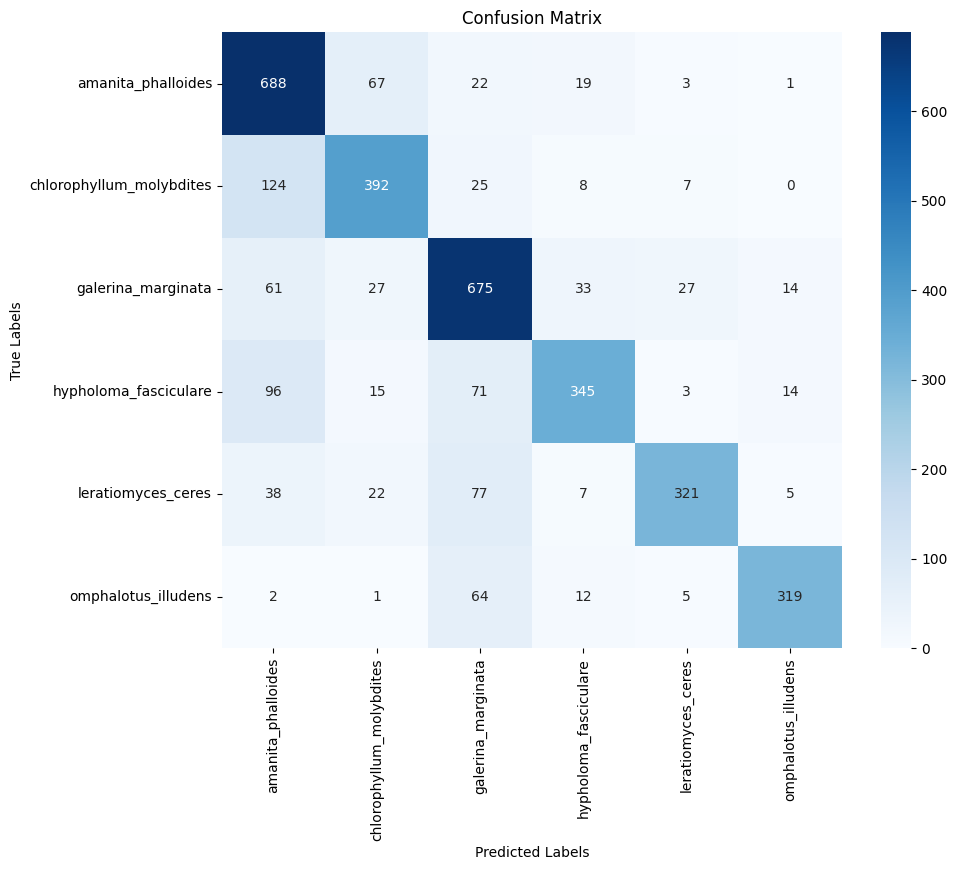

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=test_data.class_indices.keys(), yticklabels=test_data.class_indices.keys())
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()